## 연관분석
- 거래나 사건에 포함된 항목 간의 관련성을 파악하여 둘 이상의 항목들로 구성된 연관성 규칙을 도출하는 탐색적인 분석

# 
# 

### 절차
1. 거래 내역 데이터를 대상으로 트랜잭션 객체 생성
2. 품목과 트랜잭션 ID관찰
3. 평가척도 (지지도, 신뢰도, 향상도)를 이용한 연관규칙 (rule)발견
4. 연관분석 결과에 대한 시각화
5. 연관분석 결과 해설 및 업무 적용

# 
# 
### 연관규칙 평가척도

# 

### 1. 지지도 : 사건 A와 사건 B가 동시에 발생하는 확률 = 품목A와 품목B가 동시에 구매될 확률

### $= Support = P(A \bigcap B) = {{품목A와 \; 품목B가 \; 동시에 \; 포함된 \; 거래수} \over {전체\;거래수}}$

- 지지도가 낮다 = A와 B품목이 동시에 구매되는 거래가 자주 발생하지 않는다
- $Support(A \rightarrow B)$ = $Support(B \rightarrow A)$


# 
# 

### 2. 신뢰도 : 사건 A가 발생할 때, 사건 B가 발생하는 조건부 확률

### $Confidence(A \rightarrow B) = P(B|A) = {{P(A \bigcap B} \over {P(A)}} = {{품목A와\; 품목B를\; 동시에\; 포함한\; 거래수} \over {품목 A를\; 포함한 \; 거래수}} = {{지지도} \over {품목A를 \; 포함한\;거래수}}$

- 지지도는 전체 거래수에 대한 비율이기에, 값이 낮은 경우에는 연관성을 판단하는데 어려움.
- 지지도의 단점을 보완하는 것이 신뢰도
- 지지도와 신뢰도가 높을수록 발견되는 규칙(rule)은 감소

# 
# 

### 3. 향상도 : 하위 항목들이 독립에서 얼마나 벗어나는 지의 정도를 측정한 값

### $Lift(A \rightarrow B) = {{신뢰도} \over {품목B를 \; 포함한 \; 거래율}} = {{P(A \bigcap B)} \over {P(A)P(B)}}$

- 지지도 또는 신뢰도가 높은 연관성 규칙 중에는 우연히 연관성이 높게 보이는 것이 나타날 수도 있음
- 이를 보완하기 위하여 향상도가 사용
- **향상도는 두 상품의 독립성 여부를 수치로 제공**
- 독립성 여부에 따라서 상품간의 상관관계를 예측 가능
    - 향상도 = 1 : 상품 A와 상품 B가 독립 (상관성 없음)
    - 향상도 $\ne$ 1 : 상품 A와 상품 B가 독립이 아님. 종속관계 (상관성 존재)
    
# 
# 
# 


### ```apriori::read.transactions(file, format, sep, cols, rm.duplicates, encoding., ..)``` : 파일을 트랜잭션 객체로 변환
- ```file``` : 트랜잭션 객체를 생성할 대상의 데이터 파일명
- ```format``` : 트랜잭션 데이터 셋의 형식 지정 
    - "bakset" : 트랜잭션 구분자 (Transaction ID)에 의해서 상품이 대응된 경우 
    - "single" : 여러 개의 상품으로 구성된 경우 (Transaction ID없이 여러 상품으로만 구성)
- ```sep``` : 각 상품을 구분하는 구분자 지정
- ```cols``` : single인 경우 읽을 칼럼 수 지정
- ```rm.duplicates``` : 중복 트랜잭션 상품 제거
- ```encoding``` : 데이터 셋의 인코딩 방식 지정

In [2]:
library(arules)
library(tidyverse)
library(arulesViz)
ggplot2::theme_set(theme_classic())

# 
#### format이 "basket"인 경우의 형태

In [3]:
data(Epub)

In [4]:
Epub[1:10] %>% inspect 

     items                      transactionID TimeStamp          
[1]  {doc_154}                  session_4795  2003-01-02 10:59:00
[2]  {doc_3d6}                  session_4797  2003-01-02 21:46:01
[3]  {doc_16f}                  session_479a  2003-01-03 00:50:38
[4]  {doc_11d, doc_1a7, doc_f4} session_47b7  2003-01-03 08:55:50
[5]  {doc_83}                   session_47bb  2003-01-03 11:27:44
[6]  {doc_11d}                  session_47c2  2003-01-04 00:18:04
[7]  {doc_368}                  session_47cb  2003-01-04 04:40:57
[8]  {doc_11d, doc_192}         session_47d8  2003-01-04 09:00:01
[9]  {doc_364}                  session_47e2  2003-01-05 02:48:36
[10] {doc_ec}                   session_47e7  2003-01-05 05:58:48


# 
# 

#### format이 "single"인 경우

In [5]:
tran_csv <- read_csv("single_format.csv")
tran_csv %>% glimpse; tran_csv %>% head

Rows: 1285 Columns: 2
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): V1
dbl (1): V2

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1,285
Columns: 2
$ V1 <chr> "2010-01-01-0823", "2010-01-01-0823", "2010-01-01-0823", "2010-01-0~
$ V2 <dbl> 10003333, 10007892, 10000005, 10040312, 10001519, 10003364, 1000337~


V1,V2
<chr>,<dbl>
2010-01-01-0823,10003333
2010-01-01-0823,10007892
2010-01-01-0823,10000005
2010-01-01-0823,10040312
2010-01-01-0823,10001519
2010-01-01-0823,10003364


In [6]:
tran_mat <- as.matrix(tran_csv, "Transaction")
tran_mat %>% head; tran_mat %>% class

V1,V2
2010-01-01-0823,10003333
2010-01-01-0823,10007892
2010-01-01-0823,10000005
2010-01-01-0823,10040312
2010-01-01-0823,10001519
2010-01-01-0823,10003364


[1] "matrix" "array"

In [7]:
tran <- read.transactions("single_format.csv", format = "single",
                          sep = ",", cols = c(1, 2), rm.duplicates = TRUE)
tran

transactions in sparse format with
 248 transactions (rows) and
 68 items (columns)

# 
# 
### DataFrame을 transaction으로 변환

In [8]:
transactionID <- c(rep("tr 1", 3), rep("tr 2", 4))
itemID <- c("item 1", "item 2", "item 3", "item 1", "item 2", "item 3", "item 5")
(tr_df <- data.frame(transactionID, itemID))

transactionID,itemID
<chr>,<chr>
tr 1,item 1
tr 1,item 2
tr 1,item 3
tr 2,item 1
tr 2,item 2
tr 2,item 3
tr 2,item 5


In [9]:
tr <- as(split(tr_df$itemID, tr_df$transactionID), "transactions")
tr

transactions in sparse format with
 2 transactions (rows) and
 4 items (columns)

In [10]:
tr %>% inspect

    items                            transactionID
[1] {item 1, item 2, item 3}         tr 1         
[2] {item 1, item 2, item 3, item 5} tr 2         


# 
### ```arules::inspect(transaction)``` : transaction 객체를 확인

In [11]:
tran[1:5] %>% inspect

    items         transactionID
[1] {10000005,                 
     10001519,                 
     10003333,                 
     10003364,                 
     10003373,                 
     10003374,                 
     10007892,                 
     10040312}  2010-01-01-0823
[2] {10000404,                 
     10001519,                 
     10003333,                 
     10003364,                 
     10003373,                 
     10003374,                 
     10007892}  2010-01-02-0822
[3] {10000005,                 
     10002195,                 
     10007892}  2010-01-03-0822
[4] {10001519,                 
     10002195,                 
     10003364,                 
     10003373,                 
     10003374}  2010-01-03-0823
[5] {10001519,                 
     10003332,                 
     10003364,                 
     10003375,                 
     10093119}  2010-01-04-0822


In [12]:
tran %>% dim

[1] 248  68

In [13]:
tran %>% summary

transactions as itemMatrix in sparse format with
 248 rows (elements/itemsets/transactions) and
 68 columns (items) and a density of 0.06949715 

most frequent items:
10001519 10003364 10003373 10093119 10003332  (Other) 
     186      183       91       84       71      557 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8 
 12  25  16  20 119  12  37   7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   5.000   4.726   5.000   8.000 

includes extended item information - examples:
    labels
1 10000005
2 10000012
3 10000085

includes extended transaction information - examples:
    transactionID
1 2010-01-01-0823
2 2010-01-02-0822
3 2010-01-03-0822

# 
# 
# 
### ```itemFrequency(data, type)``` : 판매의 상대도수
- ```type``` : "absolute"로 지정시 도수

In [14]:
itemFrequency(tran, type = "absolute") %>% print

10000005 10000012 10000085 10000404 10001209 10001476 10001519 10002195 
      15       15        3        1        3        7      186       36 
10003162 10003332 10003333 10003334 10003336 10003339 10003344 10003346 
       8       71        6        4        2        2       12        3 
10003349 10003351 10003353 10003356 10003364 10003373 10003374 10003375 
      33        1        2        2      183       91       49       55 
10004364 10004365 10004366 10004368 10004369 10006852 10007892 10014911 
       7       35        8        2        2        1       10        2 
10024494 10040312 10049781 10049899 10050494 10075031 10093119 10100907 
       1       22        5        1        3        1       84        1 
10152219 10153947 10156594 10168051 10169628 10171892 10177250 10178187 
       1        2        2       14        3        1        3       12 
10186585 10188122 10198388 10200596 10200597 10202734 10202857 10205429 
      17        4        2        3       45       

### ```itemFrequencyPlot(data, topN, type)```

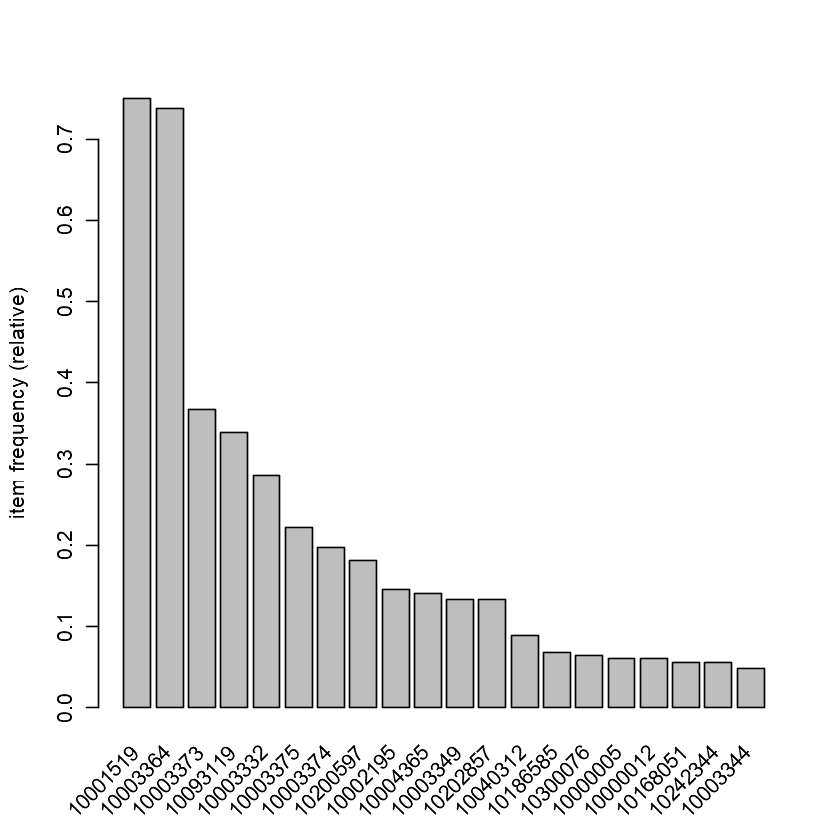

In [15]:
itemFrequencyPlot(tran, topN = 20)

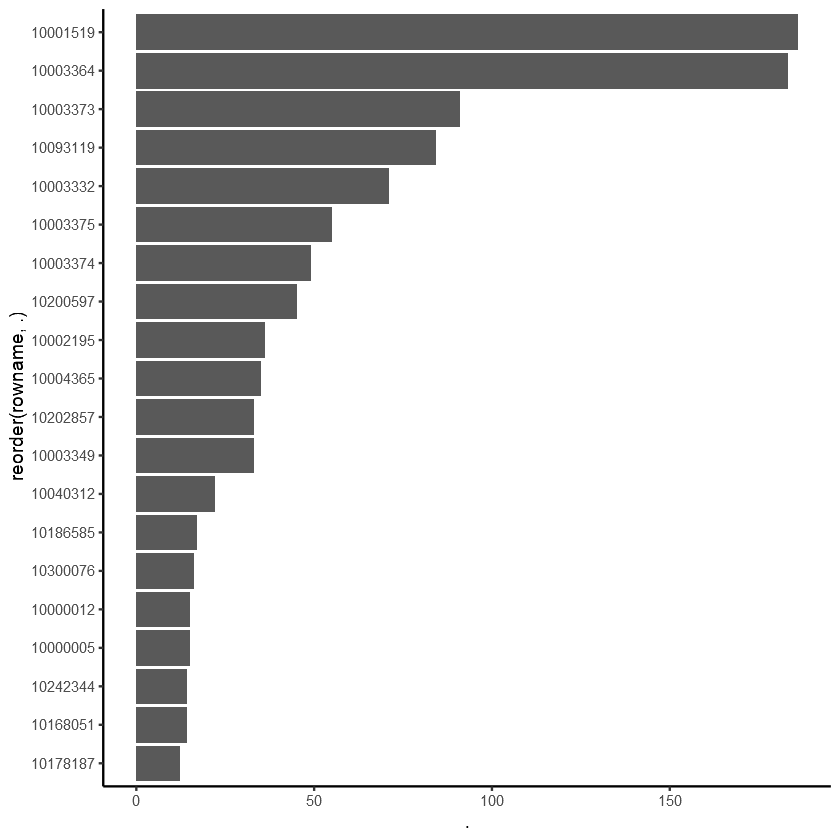

In [16]:
itemFrequencyGGPlot <- function(x, topN) {
  library(tidyverse)
  x %>%
    itemFrequency(type = "absolute") %>%
    sort %>%
    tail(topN) %>%
    as.data.frame %>%
    tibble::rownames_to_column() %>%
    ggplot(aes(reorder(rowname, `.`),`.`)) + 
    geom_col() + 
    coord_flip()
}  

itemFrequencyGGPlot(tran, 20)

# 
### ```arules::eclat(data, parameter, control)``` : 조건을 만족하는 물품 조합 개수 탐색
- ```parameter``` : 규칙 발견을 위한 조건 지정  
    - supp : 최소 지지도
    - conf : 최소 신뢰도
    - minlen : 최소 물품수 
    - maxlen : 최대 물품수
    - smax : 최대 지지도 

# 
- 지지도가 0.2 이상이고, 개수가 2개 이상인 물품 조합의 개수

In [17]:
(ecl <- eclat(tran, parameter = c(supp = 0.2, minlen = 2), 
              control = list(verbose = FALSE)))

set of 13 itemsets 

- 최대 지지도 = 0.734. (10001519, 100003364)

In [18]:
ecl %>% summary

set of 13 itemsets

most frequent items:
10001519 10003364 10003332 10003373 10003375  (Other) 
       9        9        3        3        3        3 

element (itemset/transaction) length distribution:sizes
2 3 
9 4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.308   3.000   3.000 

summary of quality measures:
    support           count       
 Min.   :0.2137   Min.   : 53.00  
 1st Qu.:0.2500   1st Qu.: 62.00  
 Median :0.3306   Median : 82.00  
 Mean   :0.3254   Mean   : 80.69  
 3rd Qu.:0.3669   3rd Qu.: 91.00  
 Max.   :0.7339   Max.   :182.00  

includes transaction ID lists: FALSE 

mining info:
 data ntransactions support
 tran           248     0.2
                                                                                       call
 eclat(data = tran, parameter = c(supp = 0.2, minlen = 2), control = list(verbose = FALSE))

In [19]:
sort(ecl) %>% head %>% inspect

    items                          support   count
[1] {10001519, 10003364}           0.7338710 182  
[2] {10001519, 10003364, 10003373} 0.3669355  91  
[3] {10001519, 10003373}           0.3669355  91  
[4] {10003364, 10003373}           0.3669355  91  
[5] {10003364, 10093119}           0.3346774  83  
[6] {10001519, 10003364, 10093119} 0.3306452  82  


# 
### ```arules::apriori(data, parameter, appearance, control)``` : 규칙 발견 
- ```parameter``` : 규칙 발견을 위한 조건 지정  
    - supp : 최소 지지도
    - conf : 최소 신뢰도
    - minlen : 최소 물품수 
    - maxlen : 최대 물품수
    - smax : 최대 지지도 

In [20]:
(rule <- apriori(tran, parameter = c(supp = 0.2, conf = 0.1, minlen = 2), 
                 control = list(verbose = FALSE)))

set of 30 rules 

In [21]:
rule %>% summary

set of 30 rules

rule length distribution (lhs + rhs):sizes
 2  3 
18 12 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     2.0     2.0     2.4     3.0     3.0 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.2137   Min.   :0.2849   Min.   :0.2137   Min.   :1.183  
 1st Qu.:0.2500   1st Qu.:0.4513   1st Qu.:0.2974   1st Qu.:1.302  
 Median :0.3306   Median :0.9699   Median :0.3669   Median :1.330  
 Mean   :0.3207   Mean   :0.7439   Mean   :0.5046   Mean   :1.305  
 3rd Qu.:0.3669   3rd Qu.:0.9929   3rd Qu.:0.7379   3rd Qu.:1.338  
 Max.   :0.7339   Max.   :1.0000   Max.   :0.7500   Max.   :1.363  
     count       
 Min.   : 53.00  
 1st Qu.: 62.00  
 Median : 82.00  
 Mean   : 79.53  
 3rd Qu.: 91.00  
 Max.   :182.00  

mining info:
 data ntransactions support confidence
 tran           248     0.2        0.1
                                                                                                     ca

- 10001519를 사는 사람은 10003364를 같이 산다 라고 해석 가능

In [22]:
sort(rule, by = "supp") %>% head %>% inspect

    lhs           rhs        support   confidence coverage  lift     count
[1] {10003364} => {10001519} 0.7338710 0.9945355  0.7379032 1.326047 182  
[2] {10001519} => {10003364} 0.7338710 0.9784946  0.7500000 1.326047 182  
[3] {10003373} => {10003364} 0.3669355 1.0000000  0.3669355 1.355191  91  
[4] {10003364} => {10003373} 0.3669355 0.4972678  0.7379032 1.355191  91  
[5] {10003373} => {10001519} 0.3669355 1.0000000  0.3669355 1.333333  91  
[6] {10001519} => {10003373} 0.3669355 0.4892473  0.7500000 1.333333  91  


- 10003364를 포함하는 규칙 이외의 규칙 발견

In [23]:
(rule <- apriori(tran, parameter = c(supp = 0.2, conf = 0.1, minlen = 2), 
                 control = list(verbose = FALSE), 
                 appearance = list(none = c("10003364"))))

set of 8 rules 

# 
#### 어떤 것을 사는 사람이 10001519를 구매하는지 탐색
- **{10003373}, {10003332, 10003364}, {10003364, 10003373}을 구매하는 사람이 주로 10001519를 같이 구매**

In [24]:
(rules2 <- apriori(tran, parameter = list(supp = 0.2, conf = 0.3, minlen = 2), 
                   appearance = list(rhs = "10001519", default = "lhs"),
                   control = list(verbose = FALSE)))

set of 9 rules 

In [25]:
sort(rules2, by = "conf") %>% inspect

    lhs                     rhs        support   confidence coverage  lift    
[1] {10003373}           => {10001519} 0.3669355 1.0000000  0.3669355 1.333333
[2] {10003332, 10003364} => {10001519} 0.2500000 1.0000000  0.2500000 1.333333
[3] {10003364, 10003373} => {10001519} 0.3669355 1.0000000  0.3669355 1.333333
[4] {10003364}           => {10001519} 0.7338710 0.9945355  0.7379032 1.326047
[5] {10003364, 10093119} => {10001519} 0.3306452 0.9879518  0.3346774 1.317269
[6] {10003364, 10003375} => {10001519} 0.2137097 0.9814815  0.2177419 1.308642
[7] {10093119}           => {10001519} 0.3306452 0.9761905  0.3387097 1.301587
[8] {10003375}           => {10001519} 0.2137097 0.9636364  0.2217742 1.284848
[9] {10003332}           => {10001519} 0.2540323 0.8873239  0.2862903 1.183099
    count
[1]  91  
[2]  62  
[3]  91  
[4] 182  
[5]  82  
[6]  53  
[7]  82  
[8]  53  
[9]  63  


# 
#### 10001519를 구매하는 사람은 무엇을 사는지 탐색
- **10001519를 사는사람은 주로 10003364를 같이 구매**

In [26]:
rules3 <- apriori(tran, parameter = list(supp = 0.2, conf = 0.3, minlen = 2),
                  appearance = list(lhs = "10001519", default = "rhs"),
                  control = list(verbose = FALSE))

In [27]:
sort(rules3, by = "conf") %>% inspect

    lhs           rhs        support   confidence coverage lift     count
[1] {10001519} => {10003364} 0.7338710 0.9784946  0.75     1.326047 182  
[2] {10001519} => {10003373} 0.3669355 0.4892473  0.75     1.333333  91  
[3] {10001519} => {10093119} 0.3306452 0.4408602  0.75     1.301587  82  
[4] {10001519} => {10003332} 0.2540323 0.3387097  0.75     1.183099  63  


# 
# 

### 지지도 신뢰도 향상도 시각화

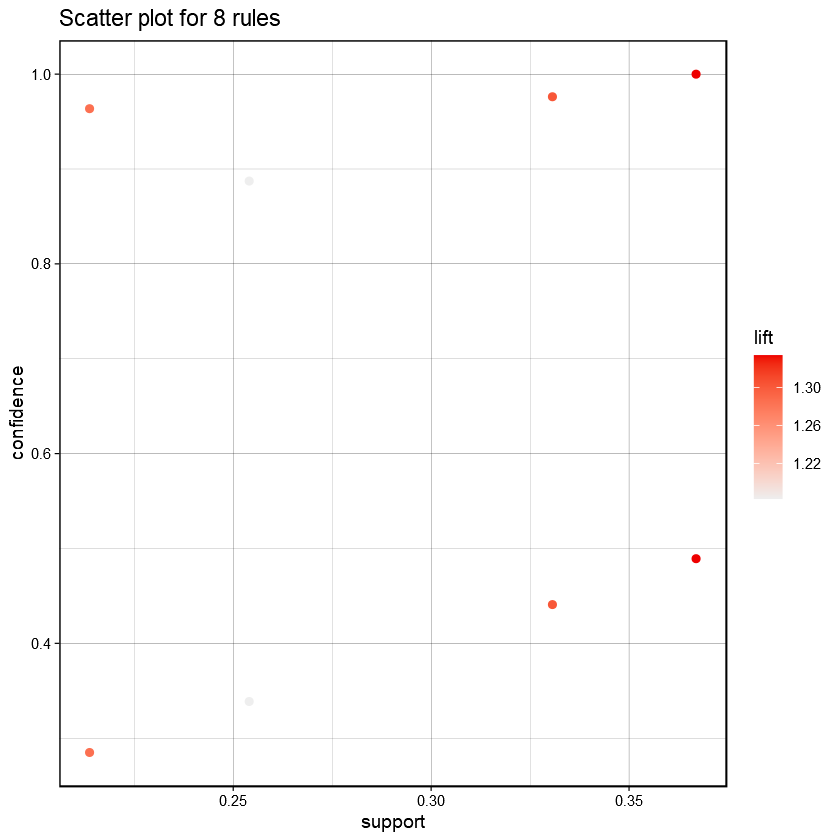

In [28]:
plot(rule, measure = c("supp", "conf"), shading = "lift")

# 
#### LHS -> RHS 별 지지도, 향상도

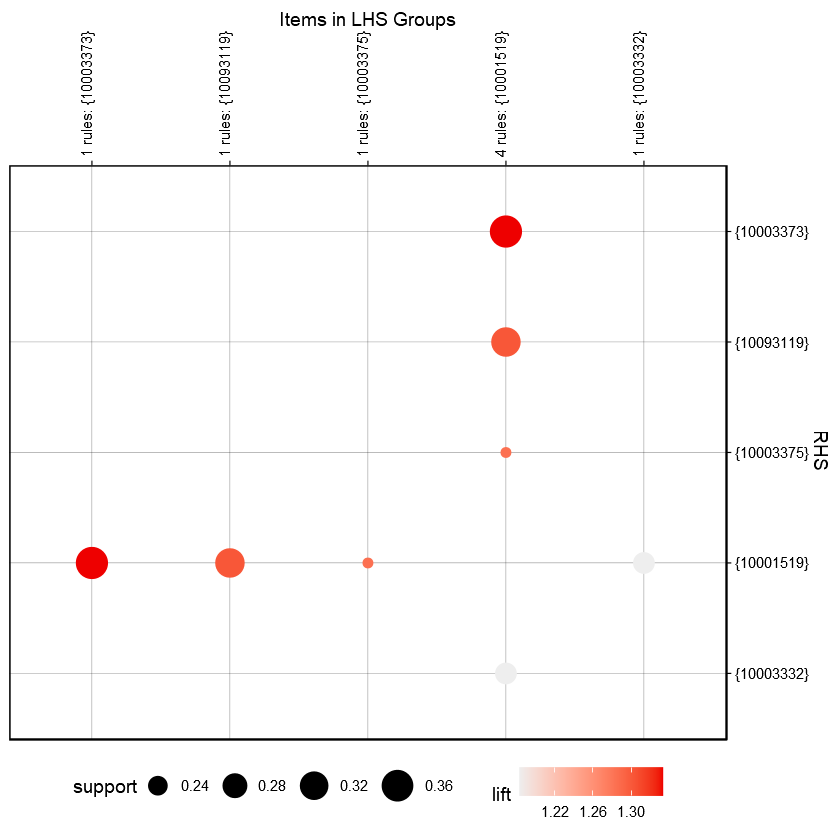

In [29]:
plot(rule, method = "grouped")

# 
#### 네트워크 그래프

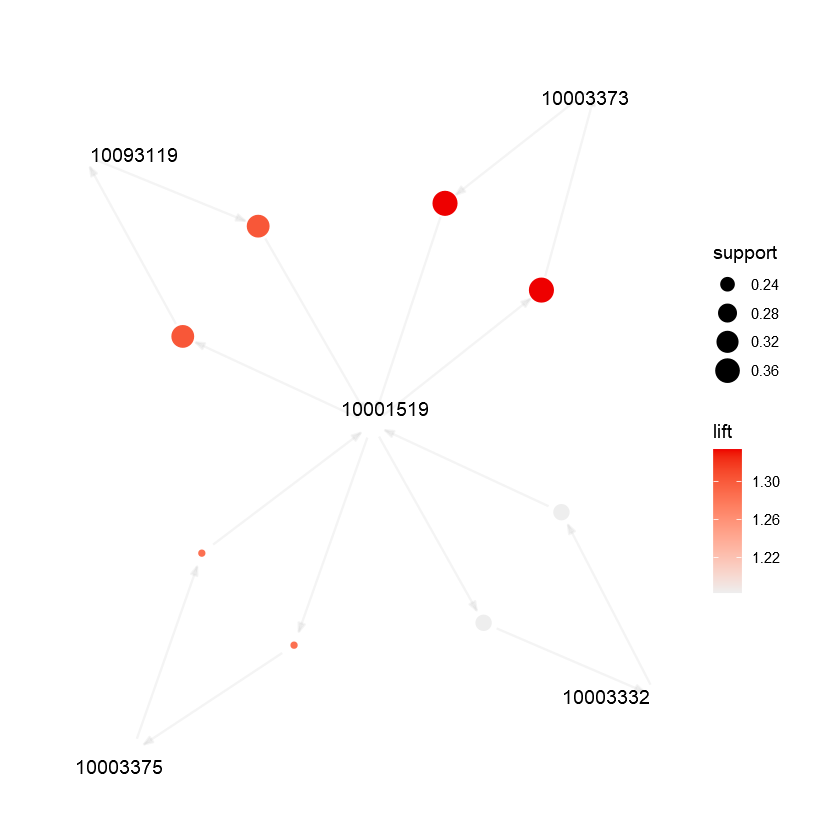

In [30]:
plot(rule, method = "graph")
# plot(rule, method = "graph", engine = "interactive")

# 

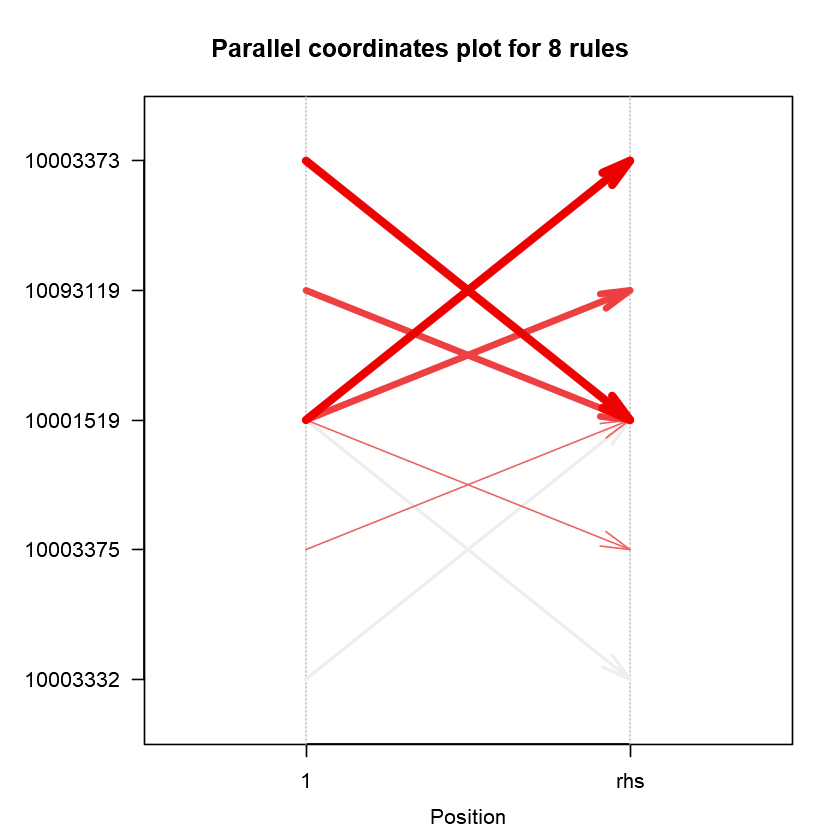

In [31]:
plot(rule, method = "paracoord")
# 색은 support의 크기 

# 
# 
# 
# 
# 

In [32]:
data(Groceries)
Groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [33]:
Groceries_df <- as(Groceries, "data.frame")
Groceries_df %>% head

,items
,<chr>
1,"{citrus fruit,semi-finished bread,margarine,ready soups}"
2,"{tropical fruit,yogurt,coffee}"
3,{whole milk}
4,"{pip fruit,yogurt,cream cheese ,meat spreads}"
5,"{other vegetables,whole milk,condensed milk,long life bakery product}"
6,"{whole milk,butter,yogurt,rice,abrasive cleaner}"


In [34]:
Groceries %>% summary

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

In [113]:
supportLevels <- c(0.01, 0.005, 0.001, 0.0005)
confidenceLevels <- seq(0.05, 0.95, 0.05)

rules_sup01 <- c()
rules_sup005 <- c()
rules_sup001 <- c()
rules_sup0005 <- c()

In [114]:
for (i in 1:length(confidenceLevels)) {
  rules_sup01[i] <- length(apriori(Groceries, 
                                   parameter = list(supp = supportLevels[1], 
                                                    conf = confidenceLevels[i],
                                                    maxlen = 2,
                                                    target = "rules"),
                                   control = list(verbose = FALSE)))
}

for (i in 1:length(confidenceLevels)) {
  rules_sup005[i] <- length(apriori(Groceries, 
                                   parameter = list(supp = supportLevels[2], 
                                                    conf = confidenceLevels[i],
                                                    maxlen = 2,
                                                    target = "rules"),
                                   control = list(verbose = FALSE)))
}

for (i in 1:length(confidenceLevels)) {
  rules_sup001[i] <- length(apriori(Groceries, 
                                   parameter = list(supp = supportLevels[3], 
                                                    conf = confidenceLevels[i], 
                                                    maxlen = 2,
                                                    target = "rules"),
                                   control = list(verbose = FALSE)))
}

for (i in 1:length(confidenceLevels)) {
  rules_sup0005[i] <- length(apriori(Groceries, 
                                   parameter = list(supp = supportLevels[4], 
                                                    conf = confidenceLevels[i], 
                                                    maxlen = 2,
                                                    target = "rules"),
                                   control = list(verbose = FALSE)))
}

In [115]:
num_rules <- data.frame(rules_sup01, rules_sup005, rules_sup001, rules_sup0005, confidenceLevels)

In [116]:
num_rules %>% head(3)

,rules_sup01,rules_sup005,rules_sup001,rules_sup0005,confidenceLevels
,<int>,<int>,<int>,<int>,<dbl>
1,445,1116,3842,5248,0.05
2,339,763,2129,2749,0.10
3,224,437,1106,1420,0.15


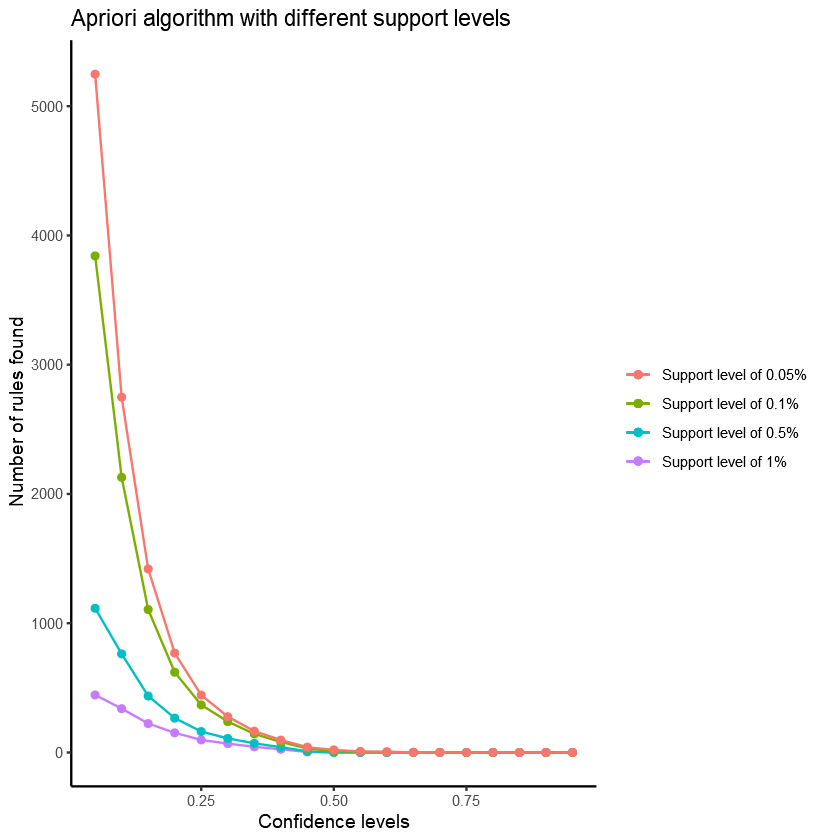

In [117]:
ggplot(data=num_rules, aes(confidenceLevels)) +
  
  geom_line(aes(y = rules_sup01, colour = "Support level of 1%")) + 
  geom_point(aes(y = rules_sup01, colour = "Support level of 1%")) +
  
  geom_line(aes(y = rules_sup005, colour = "Support level of 0.5%")) +
  geom_point(aes(y = rules_sup005, colour = "Support level of 0.5%")) +
  
  geom_line(aes(y = rules_sup001, colour = "Support level of 0.1%")) + 
  geom_point(aes(y = rules_sup001, colour = "Support level of 0.1%")) +
  
  geom_line(aes(y = rules_sup0005, colour = "Support level of 0.05%")) +
  geom_point(aes(y = rules_sup0005, colour = "Support level of 0.05%")) +
  
  labs(x = "Confidence levels", y = "Number of rules found", 
       title = "Apriori algorithm with different support levels") +
  theme(legend.title = element_blank())

In [225]:
(rules <- apriori(Groceries, 
                  parameter = list(supp = 0.01, conf = 0.3, 
                                   maxlen = 2, minlen = 2, target = "rules"),
                  control = list(verbose = FALSE)))

set of 69 rules 

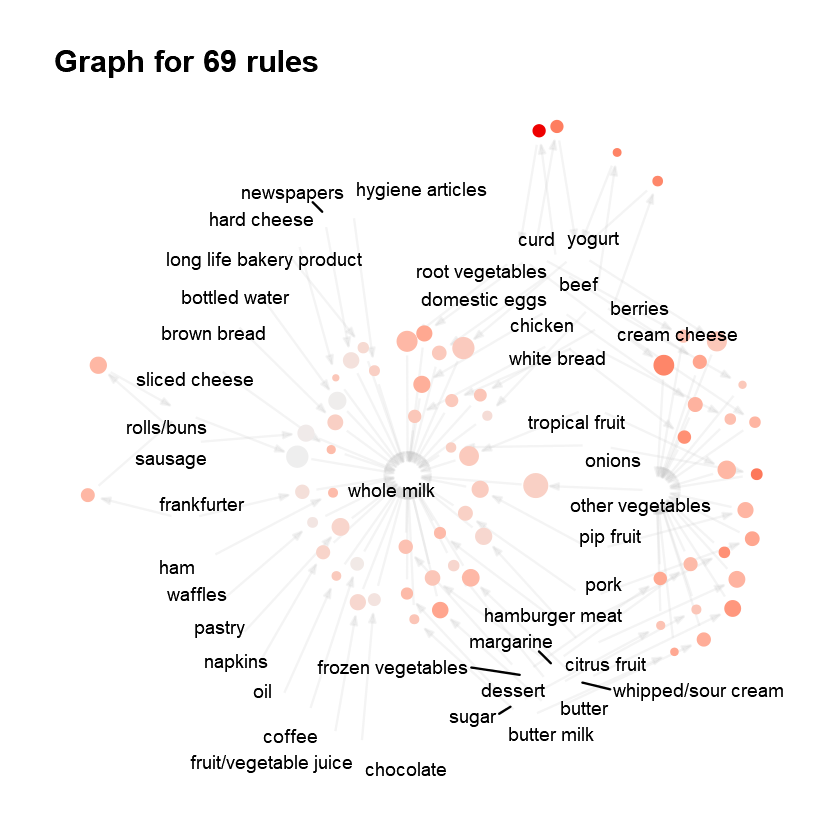

In [226]:
plot(rules, method = "graph") + labs(title = "Graph for 69 rules") + 
    theme(legend.position = "none")

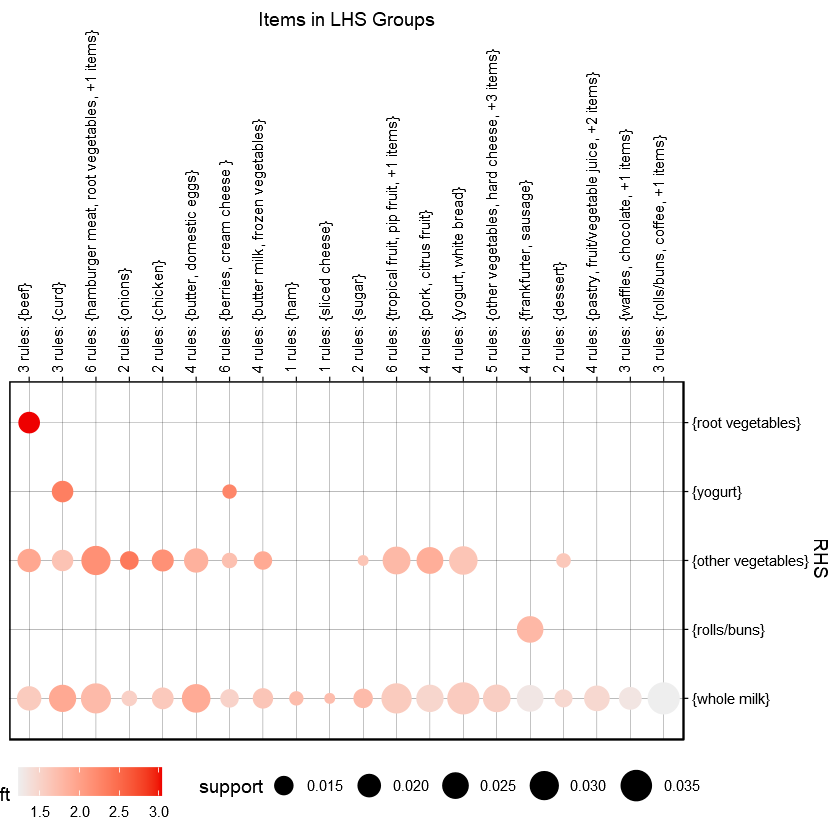

In [227]:
plot(rules, method = "grouped")

In [228]:
sort(rules, by = "count") %>% head %>% inspect

    lhs                   rhs                support    confidence coverage 
[1] {other vegetables} => {whole milk}       0.07483477 0.3867578  0.1934926
[2] {rolls/buns}       => {whole milk}       0.05663447 0.3079049  0.1839349
[3] {yogurt}           => {whole milk}       0.05602440 0.4016035  0.1395018
[4] {root vegetables}  => {whole milk}       0.04890696 0.4486940  0.1089985
[5] {root vegetables}  => {other vegetables} 0.04738180 0.4347015  0.1089985
[6] {yogurt}           => {other vegetables} 0.04341637 0.3112245  0.1395018
    lift     count
[1] 1.513634 736  
[2] 1.205032 557  
[3] 1.571735 551  
[4] 1.756031 481  
[5] 2.246605 466  
[6] 1.608457 427  


# 
# 

In [229]:
write(sort(rules, by = "lift"), "rules.csv", 
      sep = ",", quote = TRUE, row.names = FALSE)

In [230]:
rules_df <- read.csv("rules.csv")
rules_df %>% head(3)

,rules,support,confidence,coverage,lift,count
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,{beef} => {root vegetables},0.01738688,0.3313953,0.05246568,3.040367,171
2,{onions} => {other vegetables},0.01423488,0.4590164,0.03101169,2.372268,140
3,{curd} => {yogurt},0.01728521,0.3244275,0.05327911,2.325615,170


In [365]:
rules_label <- str_remove_all(rules_df$rules, pattern = "\\{|\\}") %>%
    str_split("=>")

In [366]:
rules_label %>% head
rules_label %>% length

[[1]]
[1] "beef "            " root vegetables"

[[2]]
[1] "onions "           " other vegetables"

[[3]]
[1] "curd "   " yogurt"

[[4]]
[1] "berries " " yogurt" 

[[5]]
[1] "root vegetables "  " other vegetables"

[[6]]
[1] "cream cheese  " " yogurt"

[1] 69

In [367]:
library(tidygraph)
library(ggraph)

library(showtext)
font_add_google(name = "Black Han Sans", family = "blackhansans")
showtext_auto()

Warning message in file.rename(tmp, destfile):
"cannot rename file 'C:\tmp\Rtmp0iCgvw\ea8Aad44WunzF9a-dL6toA8r8nqVIXSkH-Hc.ttf.curltmp' to 'C:\tmp\Rtmp0iCgvw\ea8Aad44WunzF9a-dL6toA8r8nqVIXSkH-Hc.ttf', reason '액세스가 거부되었습니다'"


In [368]:
rule_mat <- do.call("rbind", rules_label) %>%
    data.frame() %>% 
    mutate(support = rules_df$support,
           confidence = rules_df$confidence,
           coverage = rules_df$coverage,
           lift = rules_df$lift,
           count = rules_df$count) %>%
    as_tbl_graph(directed = FALSE) %>%
    mutate(centrality = centrality_degree(),
           group = as.factor(group_infomap()))

In [369]:
rule_mat

# A tbl_graph: 46 nodes and 69 edges
#
# An undirected simple graph with 1 component
#
# Node Data: 46 x 3 (active)
  name               centrality group
  <chr>                   <dbl> <fct>
1 "beef "                     3 3    
2 "onions "                   2 1    
3 "curd "                     3 1    
4 "berries "                  3 1    
5 "root vegetables "          2 1    
6 "cream cheese  "            3 1    
# ... with 40 more rows
#
# Edge Data: 69 x 7
   from    to support confidence coverage  lift count
  <int> <int>   <dbl>      <dbl>    <dbl> <dbl> <int>
1     1    42  0.0174      0.331   0.0525  3.04   171
2     2    43  0.0142      0.459   0.0310  2.37   140
3     3    44  0.0173      0.324   0.0533  2.33   170
# ... with 66 more rows

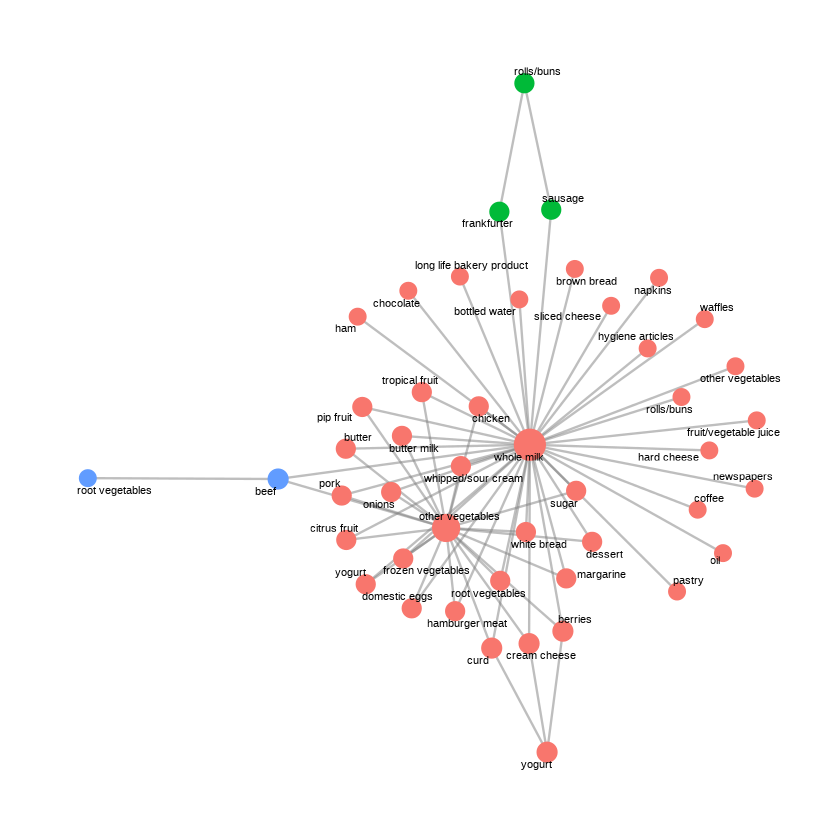

In [374]:
set.seed(0913)
rule_mat %>% ggraph(layout = 'fr') + 
    geom_edge_link(color = "gray50", alpha = 0.5) + 
    geom_node_point(aes(size = centrality, color = group), 
                    show.legend = FALSE) +  
    scale_size(range = c(4, 8)) + 
    geom_node_text(aes(label = name),
                   repel = TRUE,
                   size = 3) +
    theme_graph()

# 
# 
### 상품 조합별 판매 수

In [47]:
supportLevels <- c(0.1, 0.05, 0.01, 0.005, 0.001, 0.0005)

freq <- c()

In [48]:
for (i in 1:length(supportLevels)) {
  freq[i] <- length(apriori(Groceries, 
                                   parameter = list(supp = supportLevels[i], 
                                                    target = "frequent"),
                                   control = list(verbose = FALSE)))
}

In [49]:
num_freq <- data.frame(supportLevels, freq)

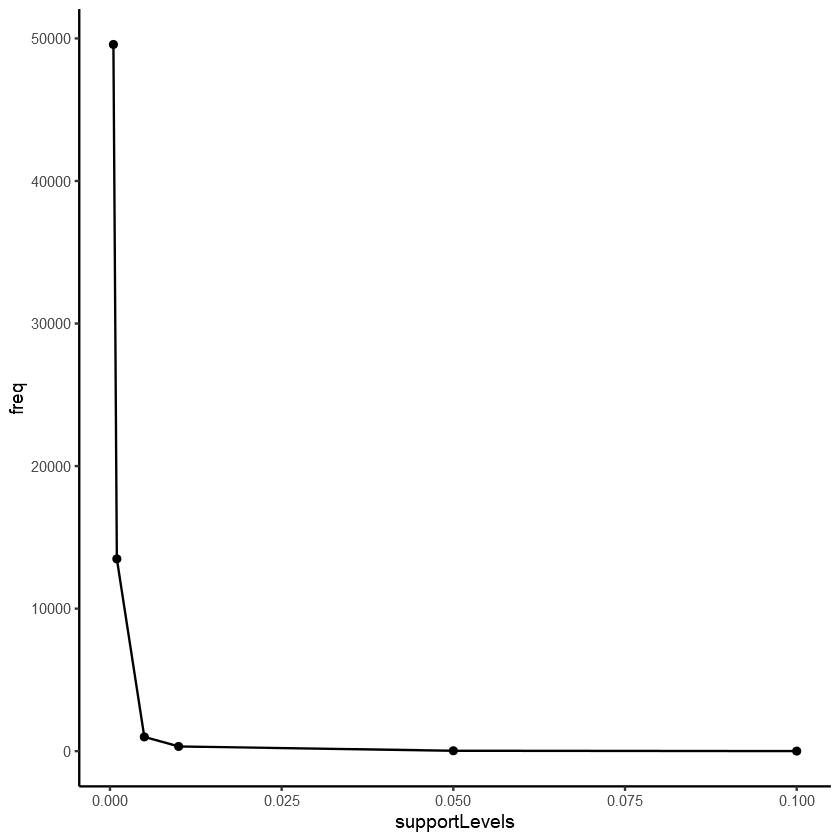

In [50]:
num_freq %>% ggplot(aes(supportLevels, freq)) + geom_point() + geom_line()

In [51]:
(rules <- apriori(Groceries, 
                  parameter = list(supp = 0.001, 
                                   target = "frequent itemsets"),
                  control = list(verbose = FALSE)))

set of 13492 itemsets 

In [52]:
sort(rules) %>% head %>% inspect

    items              support   count
[1] {whole milk}       0.2555160 2513 
[2] {other vegetables} 0.1934926 1903 
[3] {rolls/buns}       0.1839349 1809 
[4] {soda}             0.1743772 1715 
[5] {yogurt}           0.1395018 1372 
[6] {bottled water}    0.1105236 1087 


In [342]:
rule <- labels(rules)